<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/ANN_Hydrofoil_abril_14_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import r2_score 

In [2]:
# para gerar o grafico no browser
%matplotlib inline

In [3]:
!git clone https://github.com/ucfilho/ANN_2021_01/
%cd ANN_2021_01

fatal: destination path 'ANN_2021_01' already exists and is not an empty directory.
/content/ANN_2021_01


In [4]:
# leitura dos dados
df=pd.read_csv("Hydrofoil_ago_29_2018.csv")
#DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv",index_col="emit")

In [5]:
df.head(3)

,Unnamed: 0,Case,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
0,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,2,1,0.103733,2.549729,-0.689028,1.353022,0.950991
2,3,3,1,0.124480,3.628461,-0.835413,1.346323,1.624000


In [6]:
df.tail(3)

,Unnamed: 0,Case,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
56,57,57,4,2.074661,274.586200,98.242317,2.955929,2048.288760
57,58,58,4,2.157647,291.257505,98.290939,2.932024,2259.555115
58,59,59,4,2.240634,286.354180,104.693695,2.979833,2306.958369


In [7]:
Dat_Select=df.iloc[:,2:]

In [8]:
Dat_Select.head(3)

,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.103733,2.549729,-0.689028,1.353022,0.950991
2,1,0.124480,3.628461,-0.835413,1.346323,1.624000


In [9]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()

X = Dat_Select[['Hydrofoil','Froude']]
y = np.array(Dat_Select[['Power']]).reshape(-1,1)


In [10]:
scaler = preprocessing.MinMaxScaler().fit(X)
scalerY = preprocessing.MinMaxScaler().fit(y)
X = scaler.transform(X)
y = scalerY.transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, shuffle=True, random_state=42)

In [12]:
# define a rede neural 
model = MLPRegressor(solver='adam',activation='tanh',alpha=1e-5,hidden_layer_sizes=(9, 8),random_state=1)

In [13]:
# treina a rede neural
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(9, 8), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [14]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(X_train)
y_calc_test=model.predict(X_test)

In [15]:
y_train

array([[1.99195117e-01],
       [0.00000000e+00],
       [1.41169692e-01],
       [0.00000000e+00],
       [3.07458225e-02],
       [1.69754754e-03],
       [4.84145419e-01],
       [3.19612504e-02],
       [1.00000000e+00],
       [1.89516710e-01],
       [8.26490925e-01],
       [6.06930640e-01],
       [7.02697349e-01],
       [2.12024633e-01],
       [6.97090626e-01],
       [5.61122515e-01],
       [9.96875000e-01],
       [3.41895347e-01],
       [3.24114088e-02],
       [6.30221838e-01],
       [6.42115025e-01],
       [4.03184421e-01],
       [2.49837943e-03],
       [2.97779819e-01],
       [5.21621111e-01],
       [2.54159464e-01],
       [8.87262316e-01],
       [7.23314607e-01],
       [2.92602996e-04],
       [1.41799914e-01],
       [4.99675886e-04],
       [2.58841112e-03],
       [4.10544512e-01],
       [1.41799914e-01],
       [2.73471262e-01],
       [9.35204192e-02],
       [3.09258859e-01],
       [2.03696701e-01],
       [2.55464924e-03],
       [7.09809853e-01],


In [16]:
# transforma dos dados calculados na forma original (nao normatizado)
y_obs_train=scalerY.inverse_transform(y_train)
y_obs_test=scalerY.inverse_transform(y_test)
y_cal_train=scalerY.inverse_transform(y_calc_train.reshape(-1,1))
y_cal_test=scalerY.inverse_transform(y_calc_test.reshape(-1,1))

In [22]:
y_obs_train

array([[6.47405554e+02],
       [0.00000000e+00],
       [4.58816682e+02],
       [0.00000000e+00],
       [9.99272302e+01],
       [5.51721208e+00],
       [1.57352469e+03],
       [1.03877501e+02],
       [3.25010756e+03],
       [6.15949691e+02],
       [2.68618440e+03],
       [1.97258986e+03],
       [2.28384197e+03],
       [6.89102861e+02],
       [2.26561951e+03],
       [1.82370853e+03],
       [3.23995097e+03],
       [1.11119665e+03],
       [1.05340565e+02],
       [2.04828876e+03],
       [2.08694290e+03],
       [1.31039273e+03],
       [8.12000187e+00],
       [9.67816439e+02],
       [1.69532471e+03],
       [8.26045596e+02],
       [2.88369796e+03],
       [2.35085027e+03],
       [9.50991210e-01],
       [4.60864971e+02],
       [1.62400037e+00],
       [8.41261455e+00],
       [1.33431382e+03],
       [4.60864971e+02],
       [8.88811016e+02],
       [3.03951421e+02],
       [1.00512456e+03],
       [6.62036188e+02],
       [8.30288480e+00],
       [2.30695837e+03],


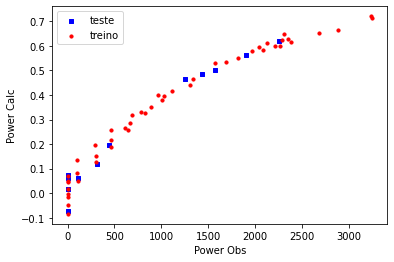

In [18]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y_obs_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_obs_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Power Calc')
plt.xlabel('Power Obs')
plt.show()

In [19]:
y_cal_test

array([[  51.46349285],
       [ 242.77349934],
       [ 392.23975989],
       [1834.39556093],
       [-232.07830282],
       [1509.65853691],
       [2018.29650611],
       [1574.64207875],
       [ 200.99371427],
       [1634.02232996],
       [ 638.6341367 ],
       [ 204.28484961]])

In [20]:
mse=mean_squared_error(y_obs_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_obs_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 1263175.378459561
R^2 teste= -0.9061712298104416


In [21]:
mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)

MSE treino= 2264097.7380509153
R^2 treino= -1.3559649998738594
